In [1]:
from google.colab import files 
uploaded=files.upload() #Cargar Libro2

Saving Libro2.csv to Libro2.csv


#   Mortandad General
##  2015-2021pr
### Por medio de este dataset medimos como se comporta la mortandad en colombia hasta la llegada del covid

In [2]:
pip install pystan

In [3]:
import io
import pandas as pd
import numpy as np
df_MortandadGeneral=pd.read_csv(io.BytesIO(uploaded['Libro2.csv']),sep=';',encoding='latin')
df_MortandadGeneral





,Año,Semana,DiaInicio,DiaFinal,Total
0,2015,2015-1,1/01/2015,4/01/2015,3973
1,2015,2015-2,5/01/2015,11/01/2015,4052
2,2015,2015-3,12/01/2015,18/01/2015,3930
3,2015,2015-4,19/01/2015,25/01/2015,3727
4,2015,2015-5,26/01/2015,1/02/2015,3637
...,...,...,...,...,...
344,2021pr,2021pr-31,2/08/2021,8/08/2021,5613
345,2021pr,2021pr-32,9/08/2021,15/08/2021,5198
346,2021pr,2021pr-33,16/08/2021,22/08/2021,4987
347,2021pr,2021pr-34,23/08/2021,29/08/2021,4668


In [4]:
pip install fbprophet

In [5]:
pip install neuralprophet

     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 155 kB 8.4 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [6]:
# Creamos la serie temporal
df_MortandadGeneral['DataSeries']=pd.DatetimeIndex(df_MortandadGeneral['DiaInicio'])
df_MortandadGeneral

,Año,Semana,DiaInicio,DiaFinal,Total,DataSeries
0,2015,2015-1,1/01/2015,4/01/2015,3973,2015-01-01
1,2015,2015-2,5/01/2015,11/01/2015,4052,2015-05-01
2,2015,2015-3,12/01/2015,18/01/2015,3930,2015-12-01
3,2015,2015-4,19/01/2015,25/01/2015,3727,2015-01-19
4,2015,2015-5,26/01/2015,1/02/2015,3637,2015-01-26
...,...,...,...,...,...,...
344,2021pr,2021pr-31,2/08/2021,8/08/2021,5613,2021-02-08
345,2021pr,2021pr-32,9/08/2021,15/08/2021,5198,2021-09-08
346,2021pr,2021pr-33,16/08/2021,22/08/2021,4987,2021-08-16
347,2021pr,2021pr-34,23/08/2021,29/08/2021,4668,2021-08-23


In [7]:
# Creamos el Dataframe que Vamos con el que vamos a pronosticar
df_PronosticoGeneral=df_MortandadGeneral[['Total','DataSeries']]
df_PronosticoGeneral=df_PronosticoGeneral.rename(columns={'Total':'y','DataSeries':'ds'})
df_PronosticoGeneral

,y,ds
0,3973,2015-01-01
1,4052,2015-05-01
2,3930,2015-12-01
3,3727,2015-01-19
4,3637,2015-01-26
...,...,...
344,5613,2021-02-08
345,5198,2021-09-08
346,4987,2021-08-16
347,4668,2021-08-23


In [8]:
from fbprophet import Prophet

In [9]:
# Creamos el modelo
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_PronosticoGeneral)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [10]:
# creamos el futuro que a pronosticar
future=m.make_future_dataframe(periods=100,freq='W')
forecast1=m.predict(future)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3889.718429,2317.754591,4681.979311,3889.718429,3889.718429,-391.278106,-391.278106,-391.278106,-317.999747,-317.999747,-317.999747,-147.838677,-147.838677,-147.838677,74.560318,74.560318,74.560318,0.0,0.0,0.0,3498.440323
1,2015-01-06,3891.226893,2615.745792,5086.049954,3891.226893,3891.226893,-85.076188,-85.076188,-85.076188,-317.999747,-317.999747,-317.999747,180.134402,180.134402,180.134402,52.789157,52.789157,52.789157,0.0,0.0,0.0,3806.150706
2,2015-01-19,3895.148900,2455.485108,4871.589145,3895.148900,3895.148900,-170.667884,-170.667884,-170.667884,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,184.289849,184.289849,184.289849,0.0,0.0,0.0,3724.481016
3,2015-01-26,3897.260750,2546.568399,5008.483677,3897.260750,3897.260750,-176.649261,-176.649261,-176.649261,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,178.308472,178.308472,178.308472,0.0,0.0,0.0,3720.611489
4,2015-02-02,3899.372600,2391.736220,4713.030165,3899.372600,3899.372600,-343.590249,-343.590249,-343.590249,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,11.367484,11.367484,11.367484,0.0,0.0,0.0,3555.782351


In [11]:
# Imprimimos el pronostico
forecast1[['ds','yhat']]

,ds,yhat
0,2015-01-01,3498.440323
1,2015-01-06,3806.150706
2,2015-01-19,3724.481016
3,2015-01-26,3720.611489
4,2015-02-02,3555.782351
...,...,...
444,2023-10-08,11049.356953
445,2023-10-15,11010.685349
446,2023-10-22,10913.816668
447,2023-10-29,10888.214875


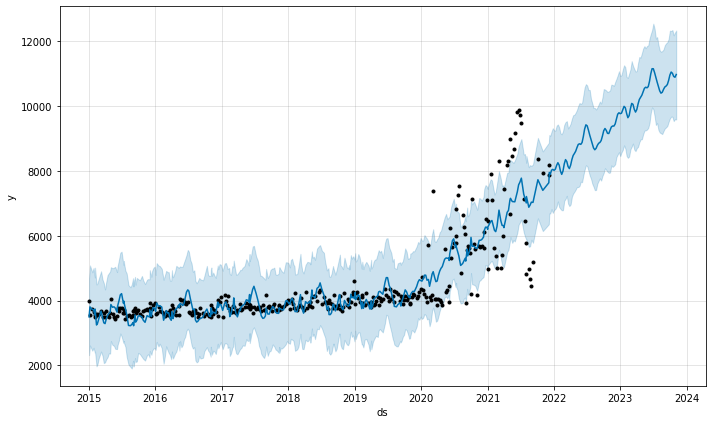

In [12]:
# Generamos el plot del pronostico
#==================================
plot1=m.plot(forecast1)
#==================================
# Como podemos ver en terminos generales a partir del 2020,
# año en el que inicio la pandemia se incrementaron las muertes generales en el país,
# Y el pronostico es que seguiran aumentando. 

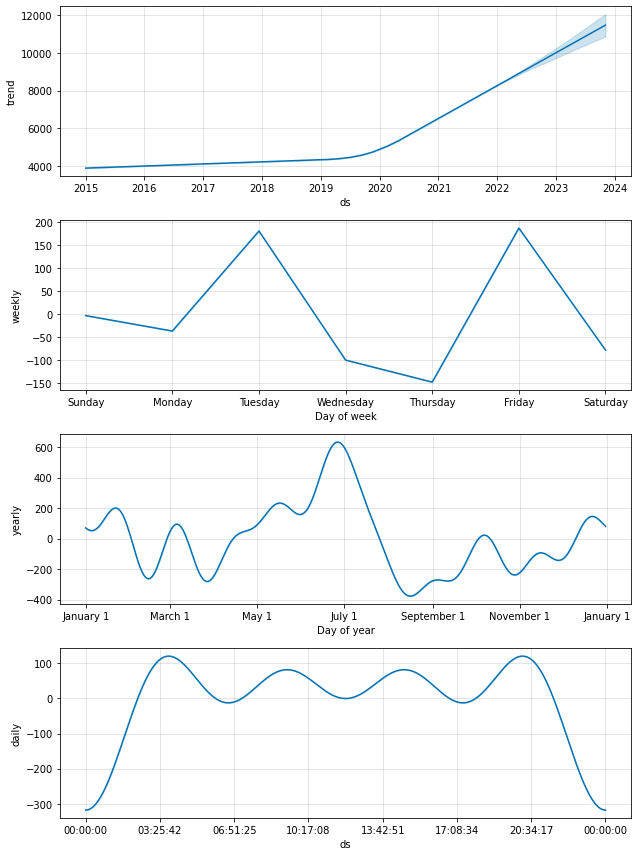

In [13]:
# Plot de la tendencia general Semanal, Anual y Diario. 
plot2=m.plot_components(forecast1)

In [14]:
# Diagnosticos de  Validacion cruzada
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv['DifYhat']=df_cv['y']-df_cv['yhat'] #creamos una columna que muestre la diferencia
df_cv['DifYhatLower']=df_cv['y']-df_cv['yhat_lower']
df_cv['DifYhatUpper']=df_cv['y']-df_cv['yhat_upper']
df_cv

INFO:fbprophet:Making 23 forecasts with cutoffs between 2015-07-07 00:00:00 and 2020-12-07 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff,DifYhat,DifYhatLower,DifYhatUpper
0,2015-07-09,2817.032791,2764.551600,2869.572864,3613,2015-07-07,795.967209,848.448400,743.427136
1,2015-07-12,2330.920547,2277.747486,2385.833802,3717,2015-07-07,1386.079453,1439.252514,1331.166198
2,2015-07-13,1894.771046,1847.402798,1945.553035,3605,2015-07-07,1710.228954,1757.597202,1659.446965
3,2015-07-20,-1012.670498,-1063.105206,-956.118436,3429,2015-07-07,4441.670498,4492.105206,4385.118436
4,2015-07-27,-5032.291855,-5087.468403,-4979.436123,3516,2015-07-07,8548.291855,8603.468403,8495.436123
...,...,...,...,...,...,...,...,...,...
1170,2021-09-08,6784.234824,6041.795139,7551.898947,5198,2020-12-07,-1586.234824,-843.795139,-2353.898947
1171,2021-10-05,6998.280851,6204.603994,7760.917823,8369,2020-12-07,1370.719149,2164.396006,608.082177
1172,2021-11-01,6692.299090,5963.190341,7494.669928,7931,2020-12-07,1238.700910,1967.809659,436.330072
1173,2021-12-04,6851.288685,6101.527516,7611.636963,7864,2020-12-07,1012.711315,1762.472484,252.363037


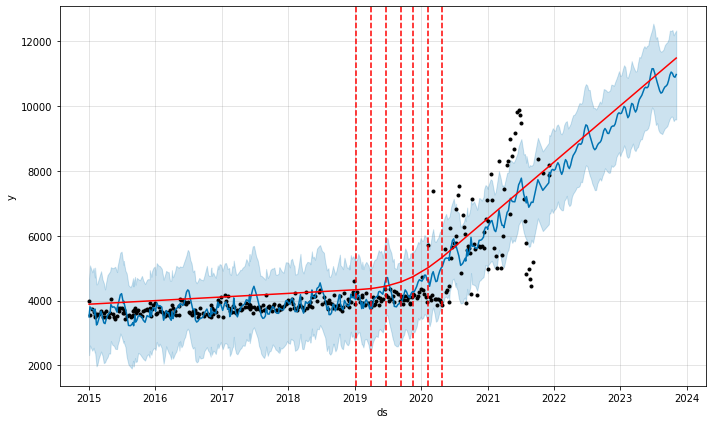

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast1)
a = add_changepoints_to_plot(fig.gca(), m, forecast1)

In [16]:
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(df_PronosticoGeneral)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = prophet.make_future_dataframe(periods=25)
forecast2 = prophet.predict(future)

In [18]:
forecast2[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,3627.457818,2889.892846,4329.325745
1,2015-01-06,3621.076136,2892.291209,4420.294328
2,2015-01-19,3800.716736,2999.083346,4515.244918
3,2015-01-26,3789.002193,3084.982759,4608.457390
4,2015-02-02,3610.406423,2886.688869,4405.054973
...,...,...,...,...
369,2021-12-28,7011.105649,6267.940180,7784.903812
370,2021-12-29,6996.332529,6217.207121,7735.715896
371,2021-12-30,6982.538938,6167.576447,7701.508070
372,2021-12-31,6970.114767,6179.594595,7689.537237


In [19]:
# Diagnosticos de  Validacion cruzada
from fbprophet.diagnostics import cross_validation

df_cv1 = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv1['Diferencia1']=df_cv1['yhat']-df_cv1['y'] #creamos una columna que muestre la diferencia
df_cv1

INFO:fbprophet:Making 23 forecasts with cutoffs between 2015-07-07 00:00:00 and 2020-12-07 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff,Diferencia1
0,2015-07-09,2817.032791,2765.377551,2869.795859,3613,2015-07-07,-795.967209
1,2015-07-12,2330.920547,2279.642229,2376.279299,3717,2015-07-07,-1386.079453
2,2015-07-13,1894.771046,1840.441283,1946.227137,3605,2015-07-07,-1710.228954
3,2015-07-20,-1012.670498,-1063.551750,-959.120936,3429,2015-07-07,-4441.670498
4,2015-07-27,-5032.291855,-5083.356621,-4978.178447,3516,2015-07-07,-8548.291855
...,...,...,...,...,...,...,...
1170,2021-09-08,6784.234824,6052.539362,7523.942641,5198,2020-12-07,1586.234824
1171,2021-10-05,6998.280851,6248.303643,7784.503033,8369,2020-12-07,-1370.719149
1172,2021-11-01,6692.299090,5866.994381,7479.704560,7931,2020-12-07,-1238.700910
1173,2021-12-04,6851.288685,5991.798367,7687.613494,7864,2020-12-07,-1012.711315


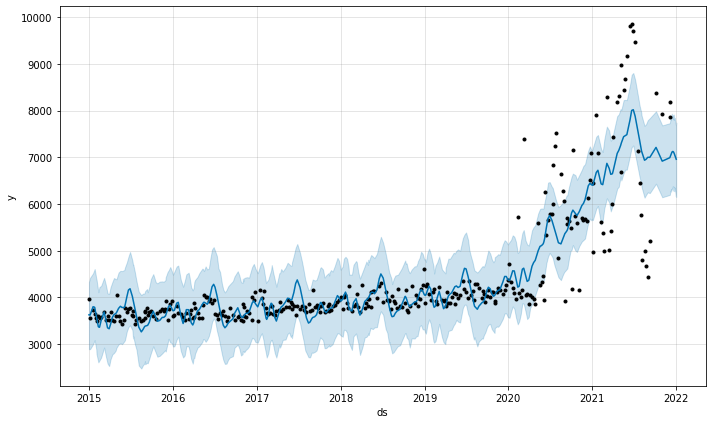

In [20]:
fig = prophet.plot(forecast2)

In [21]:
df_MortandadGeneral.to_excel('MortandadGeneral.xlsx')
df_PronosticoGeneral.to_excel('PronosticoGeneral.xlsx')
forecast1.to_excel('PrimerForecastGeneral.xlsx')
df_cv.to_excel('PrimeraValidacionCruzadaGeneral1.xlsx')
forecast2.to_excel('SegundoForecastGeneral.xlsx')
df_cv.to_excel('SegundaValidacionCruzadaGeneral2.xlsx')


#  Defunciones Covid Colombia
## Procedemos a cargar el dataset de casos de covid Colombia

In [22]:
from google.colab import files 
uploaded=files.upload() # Cargar Defunciones_Covid-19_Colombia


Saving Defunciones_COVID-19_Colombia.csv to Defunciones_COVID-19_Colombia.csv


In [23]:
df_DefuncionesCovid=pd.read_csv(io.BytesIO(uploaded['Defunciones_COVID-19_Colombia.csv']),dtype={ 
                                                                'ID de caso':str,
                                                                'Código DIVIPOLA departamento':str,
                                                                'Nombre departamento':str,    
                                                                'Código DIVIPOLA municipio':str,    
                                                                'Nombre municipio':str,         
                                                                'Edad':int,        
                                                                'Unidad de medida de edad':str,     
                                                                'Sexo':str,     
                                                                'Código ISO del país':str,    
                                                                'Nombre del país':str,    
                                                                'Recuperado':str,    
                                                                'Tipo de recuperación':str,       
                                                                'Pertenencia étnica':str,       
                                                                'Nombre del grupo étnico':str
                                                                },low_memory=False)
df_DefuncionesCovid


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,20/3/2020 0:00:00,152,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,65,1,M,Importado,Fallecido,Fallecido,840,ESTADOS UNIDOS DE AMÉRICA,Fallecido,10/3/2020 0:00:00,5/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
1,20/3/2020 0:00:00,153,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,53,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,18/3/2020 0:00:00,6/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
2,20/3/2020 0:00:00,157,20/3/2020 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,88,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,12/3/2020 0:00:00,23/3/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
3,21/3/2020 0:00:00,188,17/3/2020 0:00:00,76,VALLE,76892,YUMBO,70,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,8/3/2020 0:00:00,22/3/2020 0:00:00,21/3/2020 0:00:00,NaN,NaN,6,NaN
4,16/3/2020 0:00:00,197,13/3/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,58,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,6/3/2020 0:00:00,16/3/2020 0:00:00,16/3/2020 0:00:00,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126580,8/10/2021 0:00:00,4968505,6/10/2021 0:00:00,11,BOGOTA,11001,BOGOTA,80,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,6/10/2021 0:00:00,7/10/2021 0:00:00,6/10/2021 0:00:00,NaN,NaN,NaN,NaN
126581,8/10/2021 0:00:00,4968535,18/6/2021 0:00:00,76,VALLE,76520,PALMIRA,61,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,12/6/2021 0:00:00,5/7/2021 0:00:00,18/6/2021 0:00:00,NaN,NaN,NaN,NaN
126582,8/10/2021 0:00:00,4968597,6/10/2021 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,96,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,3/10/2021 0:00:00,9/10/2021 0:00:00,7/10/2021 0:00:00,NaN,NaN,NaN,NaN
126583,8/10/2021 0:00:00,4968602,3/10/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,102,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,29/9/2021 0:00:00,3/10/2021 0:00:00,3/10/2021 0:00:00,NaN,NaN,NaN,NaN


In [24]:
#Creamos un nuevo Dataframe en el que filtramos las 3 columnas que necesitamos 
df_MortandadCovid=df_DefuncionesCovid[['Recuperado','Fecha de muerte','Edad']].dropna()
df_MortandadCovid

,Recuperado,Fecha de muerte,Edad
0,Fallecido,5/4/2020 0:00:00,65
1,Fallecido,6/4/2020 0:00:00,53
2,Fallecido,23/3/2020 0:00:00,88
3,Fallecido,22/3/2020 0:00:00,70
4,Fallecido,16/3/2020 0:00:00,58
...,...,...,...
126580,Fallecido,7/10/2021 0:00:00,80
126581,Fallecido,5/7/2021 0:00:00,61
126582,Fallecido,9/10/2021 0:00:00,96
126583,Fallecido,3/10/2021 0:00:00,102


In [25]:
#Creamos la nueva columna para para contabilizar la cantidad de fallecidos por covid.
def fallecidos(fila):
    f=fila['Recuperado']
    if f=='Fallecido' or f=='fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_MortandadCovid.loc[:,'Fallecidos']=df_MortandadCovid.apply(fallecidos,axis=1)
df_MortandadCovid.head()

,Recuperado,Fecha de muerte,Edad,Fallecidos
0,Fallecido,5/4/2020 0:00:00,65,1
1,Fallecido,6/4/2020 0:00:00,53,1
2,Fallecido,23/3/2020 0:00:00,88,1
3,Fallecido,22/3/2020 0:00:00,70,1
4,Fallecido,16/3/2020 0:00:00,58,1


In [26]:
# Creamos el cluster con el que vamos a igualar los datos consolidados de acuerdo como lo presentan los investigadores de Saludata colombia 
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=9:
        resultado="0-9"
        return resultado
    else:
        if decil>=10 and decil<=19:
            resultado="10-19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20-29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30-39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40-49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50-59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60-69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70-79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80-89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=115:
                                            resultado="90+"
                                            return resultado
df_MortandadCovid.loc[:,'Rango_Edad']=df_MortandadCovid.apply(cluster_edad,axis=1)
df_MortandadCovid
#df_defuncion['Rango_Edad']=df_defuncion.apply(cluster_edad,axis=1)


,Recuperado,Fecha de muerte,Edad,Fallecidos,Rango_Edad
0,Fallecido,5/4/2020 0:00:00,65,1,60-69
1,Fallecido,6/4/2020 0:00:00,53,1,50-59
2,Fallecido,23/3/2020 0:00:00,88,1,80-89
3,Fallecido,22/3/2020 0:00:00,70,1,70-79
4,Fallecido,16/3/2020 0:00:00,58,1,50-59
...,...,...,...,...,...
126580,Fallecido,7/10/2021 0:00:00,80,1,80-89
126581,Fallecido,5/7/2021 0:00:00,61,1,60-69
126582,Fallecido,9/10/2021 0:00:00,96,1,90+
126583,Fallecido,3/10/2021 0:00:00,102,1,90+


In [27]:
# Creamos un nuevo Dataframe en el que consolidamos por fechas el numero de fallecidos.
df_TotalMortandadCovid=df_MortandadCovid.groupby(by='Fecha de muerte').agg({'Fallecidos':'sum'}).reset_index()
df_TotalMortandadCovid

,Fecha de muerte,Fallecidos
0,1/1/2021 0:00:00,327
1,1/10/2020 0:00:00,177
2,1/10/2021 0:00:00,31
3,1/11/2020 0:00:00,160
4,1/12/2020 0:00:00,172
...,...,...
566,9/7/2021 0:00:00,456
567,9/8/2020 0:00:00,319
568,9/8/2021 0:00:00,165
569,9/9/2020 0:00:00,197


In [28]:
# Creamos la nueva columna que convertimos en la serie temporal.
df_TotalMortandadCovid.loc[:,'DataSeries']=pd.DatetimeIndex(df_TotalMortandadCovid['Fecha de muerte'])
df_TotalMortandadCovid


,Fecha de muerte,Fallecidos,DataSeries
0,1/1/2021 0:00:00,327,2021-01-01
1,1/10/2020 0:00:00,177,2020-01-10
2,1/10/2021 0:00:00,31,2021-01-10
3,1/11/2020 0:00:00,160,2020-01-11
4,1/12/2020 0:00:00,172,2020-01-12
...,...,...,...
566,9/7/2021 0:00:00,456,2021-09-07
567,9/8/2020 0:00:00,319,2020-09-08
568,9/8/2021 0:00:00,165,2021-09-08
569,9/9/2020 0:00:00,197,2020-09-09


In [29]:
# Creamos el DataFrame de Pronostico
df_PronosticoMortandadCovid=df_TotalMortandadCovid[['Fallecidos','DataSeries']]
df_PronosticoMortandadCovid=df_PronosticoMortandadCovid.rename(columns={'Fallecidos':'y','DataSeries':'ds'})
df_PronosticoMortandadCovid

,y,ds
0,327,2021-01-01
1,177,2020-01-10
2,31,2021-01-10
3,160,2020-01-11
4,172,2020-01-12
...,...,...
566,456,2021-09-07
567,319,2020-09-08
568,165,2021-09-08
569,197,2020-09-09


In [30]:
# Creamos el modelo de pronostico con estacionalidad semanal
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_PronosticoMortandadCovid)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [31]:
# Creamos el futuro que va a pronosticar.
future=m.make_future_dataframe(periods=200,freq='W')
forecast3=m.predict(future)
forecast3#.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,16.978952,-255.563200,330.286150,16.978952,16.978952,41.414458,41.414458,41.414458,51.993899,51.993899,51.993899,-10.579440,-10.579440,-10.579440,0.0,0.0,0.0,58.393410
1,2020-01-05,17.447713,-224.472226,388.945725,17.447713,17.447713,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,70.597528
2,2020-01-06,17.916474,-211.205344,370.826086,17.916474,17.916474,53.348372,53.348372,53.348372,51.993899,51.993899,51.993899,1.354474,1.354474,1.354474,0.0,0.0,0.0,71.264846
3,2020-01-07,18.385235,-222.547653,344.777618,18.385235,18.385235,51.521788,51.521788,51.521788,51.993899,51.993899,51.993899,-0.472111,-0.472111,-0.472111,0.0,0.0,0.0,69.907023
4,2020-01-08,18.853996,-220.942711,393.804075,18.853996,18.853996,57.994868,57.994868,57.994868,51.993899,51.993899,51.993899,6.000969,6.000969,6.000969,0.0,0.0,0.0,76.848864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2025-09-07,-41.282384,-476.587911,517.708620,-454.210152,375.394787,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,11.867431
767,2025-09-14,-42.595893,-490.290620,505.846552,-460.412641,378.074129,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,10.553922
768,2025-09-21,-43.909402,-526.732426,548.183258,-465.768559,379.657765,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,9.240413
769,2025-09-28,-45.222911,-465.265420,517.302388,-469.498947,382.137711,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,7.926904


In [32]:
# Imprimimos el Pronostico
forecast3[['ds','trend','yhat']]

,ds,trend,yhat
0,2020-01-04,16.978952,58.393410
1,2020-01-05,17.447713,70.597528
2,2020-01-06,17.916474,71.264846
3,2020-01-07,18.385235,69.907023
4,2020-01-08,18.853996,76.848864
...,...,...,...
766,2025-09-07,-41.282384,11.867431
767,2025-09-14,-42.595893,10.553922
768,2025-09-21,-43.909402,9.240413
769,2025-09-28,-45.222911,7.926904


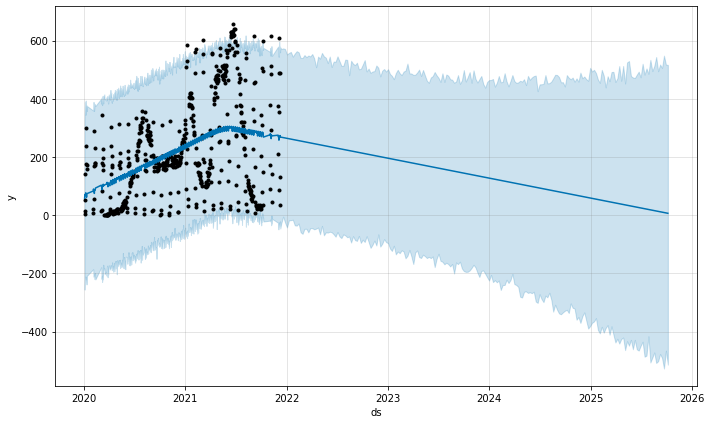

In [33]:
# Creamos el Plot del pronostico de la cantidad contra la serie temporal
plot3=m.plot(forecast3)
# Al igual que en el dataset de los estados unidos vemos una tendencia a la baja de muertes por covid,
# A partir del 2027 tiende a descender a 0
# por lo que es necesario revisar el caso de las comorbilidades  

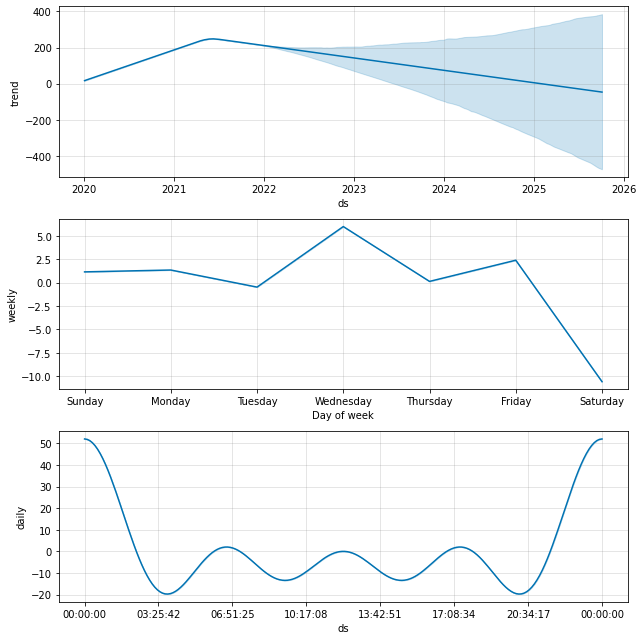

In [34]:
plot4=m.plot_components(forecast3)

In [35]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from pandas import DataFrame
from pandas import to_datetime


In [36]:
# Diagnosticos de  Validacion cruzada
df_cv2 = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv2['Diferencia']=df_cv2['yhat']-df_cv2['y'] #creamos una columna que muestre la diferencia
df_cv2

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-10 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,Diferencia
0,2020-09-11,223.123276,30.336822,421.277069,167,2020-09-10,56.123276
1,2020-09-12,216.050752,20.872767,406.334419,196,2020-09-10,20.050752
2,2020-09-13,212.546019,1.851137,400.417830,185,2020-09-10,27.546019
3,2020-09-14,211.691597,23.044156,399.493279,183,2020-09-10,28.691597
4,2020-09-15,218.766232,23.421932,413.726044,181,2020-09-10,37.766232
...,...,...,...,...,...,...,...
641,2021-12-05,310.409607,122.004899,500.140960,490,2020-12-09,-179.590393
642,2021-12-06,312.290342,132.306987,496.320648,607,2020-12-09,-294.709658
643,2021-12-07,314.698380,129.448654,494.339846,487,2020-12-09,-172.301620
644,2021-12-08,320.716510,138.938747,505.679433,131,2020-12-09,189.716510


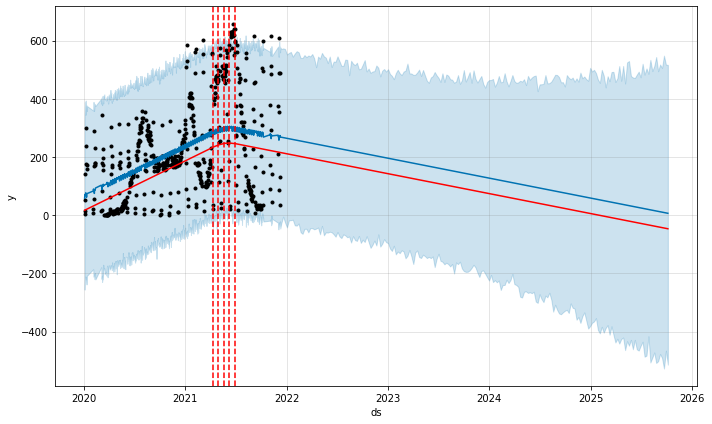

In [37]:
#from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), m, forecast3)

In [38]:
prophet = Prophet(daily_seasonality=True, changepoint_range=0.85,changepoint_prior_scale=0.2)
prophet.fit(df_PronosticoMortandadCovid)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


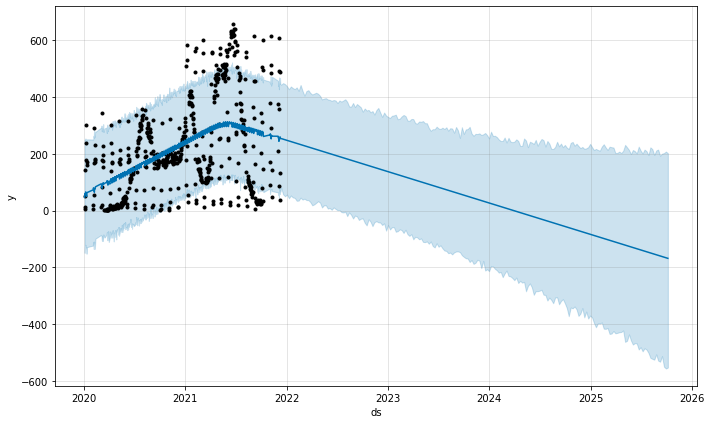

In [40]:
# Ajuste de flexibilidad de tendencia
m = Prophet(changepoint_prior_scale=0.05)
forecast4 = m.fit(df_PronosticoMortandadCovid).predict(future)
fig = m.plot(forecast4)

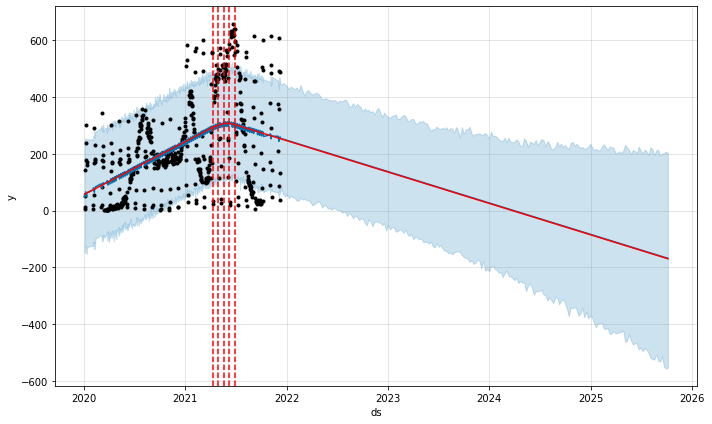

In [41]:
fig = m.plot(forecast4)
a = add_changepoints_to_plot(fig.gca(), m, forecast4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


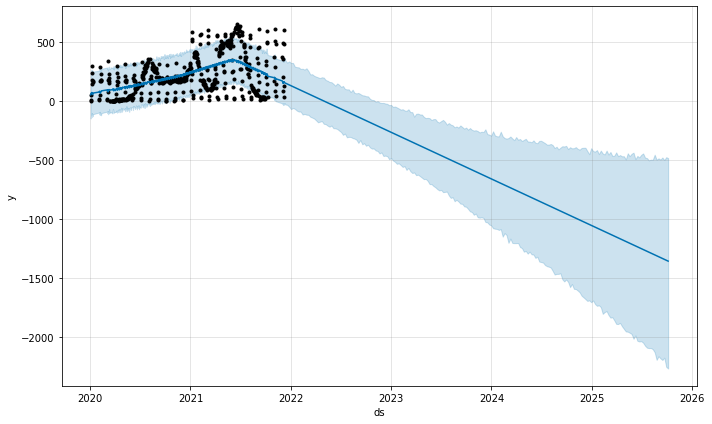

In [42]:
# Ajuste de flexibilidad de tendencia
m = Prophet(changepoint_prior_scale=0.2)
forecast5 = m.fit(df_PronosticoMortandadCovid).predict(future)
fig = m.plot(forecast5)

In [43]:
# Diagnosticos de  Validacion cruzada
df_cv3 = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv3['Diferencia2']=df_cv3['yhat']-df_cv3['y'] #creamos una columna que muestre la diferencia
df_cv3

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-10 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,Diferencia2
0,2020-09-11,277.467939,161.312941,384.666419,167,2020-09-10,110.467939
1,2020-09-12,269.443873,161.163156,381.212927,196,2020-09-10,73.443873
2,2020-09-13,267.003686,160.796892,379.065019,185,2020-09-10,82.003686
3,2020-09-14,270.211717,158.017505,386.218913,183,2020-09-10,87.211717
4,2020-09-15,277.043832,169.159741,386.399622,181,2020-09-10,96.043832
...,...,...,...,...,...,...,...
641,2021-12-05,-31.254079,-364.330271,321.236184,490,2020-12-09,-521.254079
642,2021-12-06,-28.370726,-362.750899,309.805551,607,2020-12-09,-635.370726
643,2021-12-07,-28.390558,-349.233405,307.029611,487,2020-12-09,-515.390558
644,2021-12-08,-23.319079,-353.376708,307.766690,131,2020-12-09,-154.319079


In [44]:
# Descargas
df_MortandadCovid.to_excel('MortandadCovid.xlsx')
df_TotalMortandadCovid.to_excel('Total_Mortandad.xlsx')
df_PronosticoMortandadCovid.to_excel('SerieTemporalMortandadCovid.xlsx')
forecast3.to_excel('Pronostico1.xlsx')
df_cv2.to_excel('ValidacionCruzada1.xlsx')
forecast4.to_excel('Pronostico2.xlsx')
df_cv3.to_excel('ValidacionCruzada2.xlsx')
forecast5.to_excel('Pronostico3.xlsx')

# DEFUNCIONES POR COMORBILIDADES DEL COVID

In [45]:
from google.colab import files 
uploaded=files.upload() #Cargar ComorbilidadesCovidColombia 

Saving ComorbilidadesCovidColombia.csv to ComorbilidadesCovidColombia.csv


In [46]:
df_MortandadComorbilidad=pd.read_csv(io.BytesIO(uploaded['ComorbilidadesCovidColombia.csv']),sep=',',encoding='latin')
df_MortandadComorbilidad


,Rango_Edad,CerebroVascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos
0,0-9,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49
1,10-19,0,2,2,5,3,3,0,0,4,2,0,1,8,0,18,48
2,20-29,5,22,25,15,6,43,2,12,14,29,14,11,36,4,154,392
3,30-39,13,59,67,40,18,119,1,27,35,45,13,19,38,10,460,964
4,40-49,9,214,231,99,42,304,5,55,58,47,26,28,82,10,1065,2275
5,50-59,38,640,536,290,108,439,27,138,136,158,53,30,160,14,2155,4922
6,60-69,94,1398,1110,554,248,530,59,394,402,255,53,23,297,18,3574,9009
7,70-79,174,1946,1066,635,279,322,59,650,683,296,57,11,380,13,3761,10332
8,80-89,194,1684,710,483,246,141,37,626,837,239,30,5,448,8,2946,8634
9,90+,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342


In [47]:
# Creamos una nueva columna para casos cerebrovasculares en la cual Estandarizamos en un rango entre 1 y 100
def tasa_cerbas(fila):
    tasa=(fila['CerebroVascular']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-CerebroVascular']=df_MortandadComorbilidad.apply(tasa_cerbas,axis=1)
#df_MortandadComorbilidad


In [48]:
# Creamos una nueva columna para casos Diabetes Mellitus en la cual Estandarizamos en un rango entre 1 y 100

def tasa_dm(fila):
    tasa=(fila['DM']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-DiabMellit']=df_MortandadComorbilidad.apply(tasa_dm,axis=1)
#df_MortandadComorbilidad


In [49]:
# Creamos una nueva columna para casos Renales en la cual Estandarizamos en un rango entre 1 y 100

def tasa_renal(fila):
    tasa=(fila['Renal']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Renal']=df_MortandadComorbilidad.apply(tasa_renal,axis=1)
#df_MortandadComorbilidad


In [50]:
def tasa_tiroide(fila):
    tasa=(fila['Tiroides']/fila['Total_Fallecidos'])*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Tiroides']=df_MortandadComorbilidad.apply(tasa_tiroide,axis=1)
#df_MortandadComorbilidad


In [51]:
# Creamos una nueva columna para casos de obesidad en la cual Estandarizamos en un rango entre 1 y 100

def tasa_obesidad(fila):
    tasa=(fila['Obesidad']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Obesidad']=df_MortandadComorbilidad.apply(tasa_obesidad,axis=1)
#df_MortandadComorbilidad


In [52]:
# Creamos una nueva columna para casos Humos en la cual Estandarizamos en un rango entre 1 y 100

def tasa_fumar(fila):
    tasa=(fila['Fumar']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Fumar']=df_MortandadComorbilidad.apply(tasa_fumar,axis=1)
#df_MortandadComorbilidad


In [53]:
# Creamos una nueva columna para casos Cardiacos en la cual Estandarizamos en un rango entre 1 y 100

def tasa_cardiaca(fila):
    tasa=(fila['Cardiaca']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Cardiaca']=df_MortandadComorbilidad.apply(tasa_cardiaca,axis=1)
#df_MortandadComorbilidad


In [54]:
# Creamos una nueva columna para casos Respiratorios en la cual Estandarizamos en un rango entre 1 y 100

def tasa_respiratoria(fila):
    tasa=(fila['Respiratoria']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Respiratoria']=df_MortandadComorbilidad.apply(tasa_respiratoria,axis=1)
#df_MortandadComorbilidad


In [55]:
# Creamos una nueva columna para casos de cancer y Tumores en la cual Estandarizamos en un rango entre 1 y 100

def tasa_cancer(fila):
    tasa=(fila['Cancer']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Cancer']=df_MortandadComorbilidad.apply(tasa_cancer,axis=1)
#df_MortandadComorbilidad


In [56]:
# Creamos una nueva columna para casos enfermedades de autoinumidad en la cual Estandarizamos en un rango entre 1 y 100

def tasa_autoinmune(fila):
    tasa=(fila['Autoinmune']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Autoinmune']=df_MortandadComorbilidad.apply(tasa_autoinmune,axis=1)
#df_MortandadComorbilidad


In [57]:
# Creamos una nueva columna para casos VIH/SIDA en la cual Estandarizamos en un rango entre 1 y 100

def tasa_vih(fila):
    tasa=(fila['Vih']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Vih']=df_MortandadComorbilidad.apply(tasa_vih,axis=1)
#df_MortandadComorbilidad


In [58]:
# Creamos una nueva columna para casos Otras Comorbilidades en la cual Estandarizamos en un rango entre 1 y 100

def tasa_otros(fila):
    tasa=(fila['Otros']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Otros']=df_MortandadComorbilidad.apply(tasa_otros,axis=1)
df_MortandadComorbilidad


,Rango_Edad,CerebroVascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos,Tasa_%-CerebroVascular,Tasa_%-DiabMellit,Tasa_%-Renal,Tasa_%-Tiroides,Tasa_%-Obesidad,Tasa_%-Fumar,Tasa_%-Cardiaca,Tasa_%-Respiratoria,Tasa_%-Cancer,Tasa_%-Autoinmune,Tasa_%-Vih,Tasa_%-Otros
0,0-9,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
1,10-19,0,2,2,5,3,3,0,0,4,2,0,1,8,0,18,48,0.000000,0.041667,0.104167,6.250000,0.062500,0.000000,0.000000,0.083333,0.041667,0.000000,0.020833,0.166667
2,20-29,5,22,25,15,6,43,2,12,14,29,14,11,36,4,154,392,0.012755,0.063776,0.038265,1.530612,0.109694,0.005102,0.030612,0.035714,0.073980,0.035714,0.028061,0.091837
3,30-39,13,59,67,40,18,119,1,27,35,45,13,19,38,10,460,964,0.013485,0.069502,0.041494,1.867220,0.123444,0.001037,0.028008,0.036307,0.046680,0.013485,0.019710,0.039419
4,40-49,9,214,231,99,42,304,5,55,58,47,26,28,82,10,1065,2275,0.003956,0.101538,0.043516,1.846154,0.133626,0.002198,0.024176,0.025495,0.020659,0.011429,0.012308,0.036044
5,50-59,38,640,536,290,108,439,27,138,136,158,53,30,160,14,2155,4922,0.007720,0.108899,0.058919,2.194230,0.089191,0.005486,0.028037,0.027631,0.032101,0.010768,0.006095,0.032507
6,60-69,94,1398,1110,554,248,530,59,394,402,255,53,23,297,18,3574,9009,0.010434,0.123210,0.061494,2.752803,0.058830,0.006549,0.043734,0.044622,0.028305,0.005883,0.002553,0.032967
7,70-79,174,1946,1066,635,279,322,59,650,683,296,57,11,380,13,3761,10332,0.016841,0.103175,0.061460,2.700348,0.031165,0.005710,0.062911,0.066105,0.028649,0.005517,0.001065,0.036779
8,80-89,194,1684,710,483,246,141,37,626,837,239,30,5,448,8,2946,8634,0.022469,0.082233,0.055942,2.849201,0.016331,0.004285,0.072504,0.096942,0.027681,0.003475,0.000579,0.051888
9,90+,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,0.022203,0.064048,0.055081,3.031597,0.009821,0.001281,0.081127,0.116140,0.021776,0.002989,0.000000,0.056789


In [59]:
# Agrupamos por la fecha de muerte todos los casos de fallecidos
df_MortandadCovidTotal=df_MortandadCovid.groupby(by=['Fecha de muerte','Rango_Edad']).agg({'Fallecidos':'sum'}).reset_index()

df_MortandadCovidTotal

,Fecha de muerte,Rango_Edad,Fallecidos
0,1/1/2021 0:00:00,0-9,1
1,1/1/2021 0:00:00,10-19,2
2,1/1/2021 0:00:00,20-29,2
3,1/1/2021 0:00:00,30-39,6
4,1/1/2021 0:00:00,40-49,25
...,...,...,...
4482,9/9/2021 0:00:00,50-59,4
4483,9/9/2021 0:00:00,60-69,10
4484,9/9/2021 0:00:00,70-79,10
4485,9/9/2021 0:00:00,80-89,14


In [60]:
# Si lo deseamos ya podemos imprimir en excel
#df_MortandadCovidTotal.to_excel('MortandadCovid.xlsx',index=False)
#df_MortandadComorbilidad.to_excel('MortandadComorbilidad.xlsx',index=False)
#print(df_MortandadComorbilidad['Edad'].describe())
#print(df_MortandadCovidTotal['Rango_Edad'].describe()) #.reset_index()

In [61]:
# Dado que no es posible unir las tablas de mortandad total de covid y la de mortandad de comorbilidades del covid, en otros programas,
# y que no hay forma de conseguir los 3 datasets en uno solo, puesto que la informacion se va actualizando, 
# desde el dane, saludata y casos positivos covid  
# Procedemos a unir las tablas por medio de comandos SQL. 
df_ExcMorComCov=df_MortandadCovidTotal.merge(df_MortandadComorbilidad,how='inner')
df_ExcMorComCov

,Fecha de muerte,Rango_Edad,Fallecidos,CerebroVascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos,Tasa_%-CerebroVascular,Tasa_%-DiabMellit,Tasa_%-Renal,Tasa_%-Tiroides,Tasa_%-Obesidad,Tasa_%-Fumar,Tasa_%-Cardiaca,Tasa_%-Respiratoria,Tasa_%-Cancer,Tasa_%-Autoinmune,Tasa_%-Vih,Tasa_%-Otros
0,1/1/2021 0:00:00,0-9,1,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
1,1/2/2021 0:00:00,0-9,1,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
2,1/7/2021 0:00:00,0-9,1,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
3,1/9/2021 0:00:00,0-9,1,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
4,10/12/2020 0:00:00,0-9,1,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000,0.020408,0.000000,2.040816,0.020408,0.000000,0.142857,0.020408,0.061224,0.020408,0.020408,0.244898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,16,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,0.022203,0.064048,0.055081,3.031597,0.009821,0.001281,0.081127,0.116140,0.021776,0.002989,0.000000,0.056789
4483,9/8/2020 0:00:00,90+,19,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,0.022203,0.064048,0.055081,3.031597,0.009821,0.001281,0.081127,0.116140,0.021776,0.002989,0.000000,0.056789
4484,9/8/2021 0:00:00,90+,11,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,0.022203,0.064048,0.055081,3.031597,0.009821,0.001281,0.081127,0.116140,0.021776,0.002989,0.000000,0.056789
4485,9/9/2020 0:00:00,90+,9,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,0.022203,0.064048,0.055081,3.031597,0.009821,0.001281,0.081127,0.116140,0.021776,0.002989,0.000000,0.056789


In [62]:
df_ExcMorComCov['Fallecidos']=(df_ExcMorComCov['Fallecidos']-df_ExcMorComCov['Fallecidos'].min())/(df_ExcMorComCov['Fallecidos'].max()-df_ExcMorComCov['Fallecidos'].min())

# DataFrame exceso de mortandad de Fallecidos por covid, con comorbilidad Cerebro Vascular

In [63]:
# Creamos un nuevo DataFrame en el que separamos los datos que necesitamos para el pronostico de los casos de fallecidos
# con comorbilidad cerebro vasculares que fallecieron por covid.
df_ExcMorCerVas=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','CerebroVascular','Tasa_%-CerebroVascular']].dropna()
#df_ExcMorCerVas['Fallecidos']=(df_ExcMorComCov['Fallecidos']-df_ExcMorComCov['Fallecidos'].min())/(df_ExcMorComCov['Fallecidos'].max()-df_ExcMorComCov['Fallecidos'].min())
df_ExcMorCerVas['FallCerVas']=((df_ExcMorComCov['Tasa_%-CerebroVascular'])*(df_ExcMorComCov['Fallecidos']))*100
df_ExcMorCerVas

,Fecha de muerte,Rango_Edad,Fallecidos,CerebroVascular,Tasa_%-CerebroVascular,FallCerVas
0,1/1/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,52,0.022203,0.190314
4483,9/8/2020 0:00:00,90+,0.102857,52,0.022203,0.228376
4484,9/8/2021 0:00:00,90+,0.057143,52,0.022203,0.126876
4485,9/9/2020 0:00:00,90+,0.045714,52,0.022203,0.101501


In [64]:
# Creamos el Dataframe Para fallecidos por covid con comoribilidades asociadas a las enfermedades cerebro vasculares.
df_PronExcMorCerVas=df_ExcMorCerVas[['Fecha de muerte','FallCerVas']].dropna()
df_PronExcMorCerVas=df_PronExcMorCerVas.rename(columns={'Fecha de muerte':'ds','FallCerVas':'y'})
df_PronExcMorCerVas=df_PronExcMorCerVas.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorCerVas

,ds,y
0,1/1/2021 0:00:00,0.271058
1,1/10/2020 0:00:00,0.177038
2,1/10/2021 0:00:00,0.037810
3,1/11/2020 0:00:00,0.147020
4,1/12/2020 0:00:00,0.179386
...,...,...
566,9/7/2021 0:00:00,0.366022
567,9/8/2020 0:00:00,0.321633
568,9/8/2021 0:00:00,0.141405
569,9/9/2020 0:00:00,0.182831


In [65]:
df_PronExcMorCerVas.describe()

,y
count,571.000000
mean,0.203579
std,0.142234
min,0.000000
25%,0.091942
50%,0.184960
75%,0.294074
max,0.573511


# DataFrame Exceso de mortandad de Fallecidos por covid, con comorbilidad DiabetesMellitus

In [66]:
# Igual como creamos el dataframe para cerebro vascular tambien lo hacemos con la diabetes mellitus
df_ExcMorDiaMel=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','DM','Tasa_%-DiabMellit']].dropna()
df_ExcMorDiaMel['FallDiaMel']=((df_ExcMorComCov['Tasa_%-DiabMellit'])*(df_ExcMorComCov['Fallecidos']))*100
df_ExcMorDiaMel


,Fecha de muerte,Rango_Edad,Fallecidos,DM,Tasa_%-DiabMellit,FallDiaMel
0,1/1/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,1,0.020408,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,150,0.064048,0.548981
4483,9/8/2020 0:00:00,90+,0.102857,150,0.064048,0.658778
4484,9/8/2021 0:00:00,90+,0.057143,150,0.064048,0.365988
4485,9/9/2020 0:00:00,90+,0.045714,150,0.064048,0.292790


In [67]:
df_PronExcMorDiaMel=df_ExcMorDiaMel[['Fecha de muerte','FallDiaMel']].dropna()
df_PronExcMorDiaMel=df_PronExcMorDiaMel.rename(columns={'Fecha de muerte':'ds','FallDiaMel':'y'})
df_PronExcMorDiaMel=df_PronExcMorDiaMel.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorDiaMel


,ds,y
0,1/1/2021 0:00:00,1.803988
1,1/10/2020 0:00:00,1.236576
2,1/10/2021 0:00:00,0.237956
3,1/11/2020 0:00:00,0.969239
4,1/12/2020 0:00:00,1.193412
...,...,...
566,9/7/2021 0:00:00,2.870014
567,9/8/2020 0:00:00,2.256148
568,9/8/2021 0:00:00,0.964839
569,9/9/2020 0:00:00,1.427652


# Dataframe exceso de mortandad de Fallecidos por covid, con comorbilidad Renal.

In [68]:
df_ExcMorRen=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Renal','Tasa_%-Renal']].dropna()
df_ExcMorRen['FallRen']=((df_ExcMorComCov['Tasa_%-Renal'])*(df_ExcMorComCov['Fallecidos']))*100
df_ExcMorRen


,Fecha de muerte,Rango_Edad,Fallecidos,Renal,Tasa_%-Renal,FallRen
0,1/1/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,129,0.055081,0.472124
4483,9/8/2020 0:00:00,90+,0.102857,129,0.055081,0.566549
4484,9/8/2021 0:00:00,90+,0.057143,129,0.055081,0.314749
4485,9/9/2020 0:00:00,90+,0.045714,129,0.055081,0.251799


In [69]:
df_PronExcMorRen=df_ExcMorRen[['Fecha de muerte','FallRen']].dropna()
df_PronExcMorRen=df_PronExcMorRen.rename(columns={'Fecha de muerte':'ds','FallRen':'y'})
df_PronExcMorRen=df_PronExcMorRen.groupby(by='ds').agg({'y':'mean'}).reset_index().round()
df_PronExcMorRen


,ds,y
0,1/1/2021 0:00:00,1.0
1,1/10/2020 0:00:00,1.0
2,1/10/2021 0:00:00,0.0
3,1/11/2020 0:00:00,1.0
4,1/12/2020 0:00:00,1.0
...,...,...
566,9/7/2021 0:00:00,2.0
567,9/8/2020 0:00:00,1.0
568,9/8/2021 0:00:00,1.0
569,9/9/2020 0:00:00,1.0


# Dataframe Exceso de mortandad de Fallecidos por covid, con comorbilidad en la glandula Tiroidea.

In [70]:
df_ExcMorTir=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Tiroides','Tasa_%-Tiroides']].dropna()
df_ExcMorTir['FallTir']=((df_ExcMorComCov['Tasa_%-Tiroides'])*(df_ExcMorComCov['Fallecidos']))*100
df_ExcMorTir


,Fecha de muerte,Rango_Edad,Fallecidos,Tiroides,Tasa_%-Tiroides,FallTir
0,1/1/2021 0:00:00,0-9,0.000000,1,2.040816,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,1,2.040816,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,1,2.040816,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,1,2.040816,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,1,2.040816,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,71,3.031597,25.985117
4483,9/8/2020 0:00:00,90+,0.102857,71,3.031597,31.182140
4484,9/8/2021 0:00:00,90+,0.057143,71,3.031597,17.323411
4485,9/9/2020 0:00:00,90+,0.045714,71,3.031597,13.858729


In [71]:
df_ExcMorTir.describe()

,Fallecidos,Tiroides,Tasa_%-Tiroides,FallTir
count,4487.000000,4487.000000,4487.000000,4487.000000
mean,0.155494,125.304212,2.489536,40.117381
std,0.188673,106.732711,0.842294,50.373637
min,0.000000,1.000000,1.530612,0.000000
25%,0.017143,18.000000,1.867220,3.498542
50%,0.080000,71.000000,2.700348,18.807686
75%,0.234286,246.000000,2.849201,61.868361
max,1.000000,279.000000,6.250000,275.280275


In [72]:
df_PronExcMorTir=df_ExcMorTir[['Fecha de muerte','FallTir']].dropna()
df_PronExcMorTir=df_PronExcMorTir.rename(columns={'Fecha de muerte':'ds','FallTir':'y'})
df_PronExcMorTir=df_PronExcMorTir.groupby(by='ds').agg({'y':'mean'}).reset_index().round()
df_PronExcMorTir


,ds,y
0,1/1/2021 0:00:00,48.0
1,1/10/2020 0:00:00,32.0
2,1/10/2021 0:00:00,6.0
3,1/11/2020 0:00:00,26.0
4,1/12/2020 0:00:00,31.0
...,...,...
566,9/7/2021 0:00:00,70.0
567,9/8/2020 0:00:00,58.0
568,9/8/2021 0:00:00,25.0
569,9/9/2020 0:00:00,35.0


# Dataframe Exceso de mortandad de Fallecidos por covid, con comorbilidad Obesidad.

In [73]:
df_ExcMorObe=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Obesidad','Tasa_%-Obesidad']].dropna()
df_ExcMorObe['FallObe']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Obesidad']))*100
df_ExcMorObe


,Fecha de muerte,Rango_Edad,Fallecidos,Obesidad,Tasa_%-Obesidad,FallObe
0,1/1/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,1,0.020408,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,23,0.009821,0.084177
4483,9/8/2020 0:00:00,90+,0.102857,23,0.009821,0.101013
4484,9/8/2021 0:00:00,90+,0.057143,23,0.009821,0.056118
4485,9/9/2020 0:00:00,90+,0.045714,23,0.009821,0.044894


In [74]:
df_PronExcMorObe=df_ExcMorObe[['Fecha de muerte','FallObe']].dropna()
df_PronExcMorObe=df_PronExcMorObe.rename(columns={'Fecha de muerte':'ds','FallObe':'y'})
df_PronExcMorObe=df_PronExcMorObe.groupby(by='ds').agg({'y':'mean'}).reset_index().round()
df_PronExcMorObe


,ds,y
0,1/1/2021 0:00:00,1.0
1,1/10/2020 0:00:00,1.0
2,1/10/2021 0:00:00,0.0
3,1/11/2020 0:00:00,0.0
4,1/12/2020 0:00:00,1.0
...,...,...
566,9/7/2021 0:00:00,2.0
567,9/8/2020 0:00:00,1.0
568,9/8/2021 0:00:00,1.0
569,9/9/2020 0:00:00,1.0


# DataFrame exceso de mortandad de fallecidos por covid con comorbilidad Humos Toxicos 

In [75]:
df_ExcMorFum=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Fumar','Tasa_%-Fumar']].dropna()
df_ExcMorFum['FallFum']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Fumar']))*100
df_ExcMorFum


,Fecha de muerte,Rango_Edad,Fallecidos,Fumar,Tasa_%-Fumar,FallFum
0,1/1/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,0,0.000000,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,3,0.001281,0.010980
4483,9/8/2020 0:00:00,90+,0.102857,3,0.001281,0.013176
4484,9/8/2021 0:00:00,90+,0.057143,3,0.001281,0.007320
4485,9/9/2020 0:00:00,90+,0.045714,3,0.001281,0.005856


In [76]:
df_PronExcMorFum=df_ExcMorFum[['Fecha de muerte','FallFum']].dropna()
df_PronExcMorFum=df_PronExcMorFum.rename(columns={'Fecha de muerte':'ds','FallFum':'y'})
df_PronExcMorFum=df_PronExcMorFum.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorFum


,ds,y
0,1/1/2021 0:00:00,0.088035
1,1/10/2020 0:00:00,0.063059
2,1/10/2021 0:00:00,0.012252
3,1/11/2020 0:00:00,0.048731
4,1/12/2020 0:00:00,0.060641
...,...,...
566,9/7/2021 0:00:00,0.134722
567,9/8/2020 0:00:00,0.111249
568,9/8/2021 0:00:00,0.044838
569,9/9/2020 0:00:00,0.071299


# Dataframe exceso de mortandad de Fallecidos por covid con comorbilidad Cardiaca


In [77]:
df_ExcMorCar=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Cardiaca','Tasa_%-Cardiaca']].dropna()
df_ExcMorCar['FallCar']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Cardiaca']))*100
df_ExcMorCar


,Fecha de muerte,Rango_Edad,Fallecidos,Cardiaca,Tasa_%-Cardiaca,FallCar
0,1/1/2021 0:00:00,0-9,0.000000,7,0.142857,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,7,0.142857,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,7,0.142857,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,7,0.142857,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,7,0.142857,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,190,0.081127,0.695376
4483,9/8/2020 0:00:00,90+,0.102857,190,0.081127,0.834452
4484,9/8/2021 0:00:00,90+,0.057143,190,0.081127,0.463584
4485,9/9/2020 0:00:00,90+,0.045714,190,0.081127,0.370867


In [78]:
df_PronExcMorcar=df_ExcMorCar[['Fecha de muerte','FallCar']].dropna()
df_PronExcMorcar=df_PronExcMorcar.rename(columns={'Fecha de muerte':'ds','FallCar':'y'})
df_PronExcMorCar=df_PronExcMorcar.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorCar


,ds,y
0,1/1/2021 0:00:00,0.987803
1,1/10/2020 0:00:00,0.641600
2,1/10/2021 0:00:00,0.136323
3,1/11/2020 0:00:00,0.539761
4,1/12/2020 0:00:00,0.651878
...,...,...
566,9/7/2021 0:00:00,1.341345
567,9/8/2020 0:00:00,1.175204
568,9/8/2021 0:00:00,0.501355
569,9/9/2020 0:00:00,0.688160


# Dataframe exceso de mortandad de Fallecidos por covid con comorbilidades respiratorias.


In [79]:
df_ExcMorRes=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Respiratoria','Tasa_%-Respiratoria']].dropna()
df_ExcMorRes['FallRes']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Respiratoria']))*100
df_ExcMorRes


,Fecha de muerte,Rango_Edad,Fallecidos,Respiratoria,Tasa_%-Respiratoria,FallRes
0,1/1/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,1,0.020408,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,272,0.116140,0.995486
4483,9/8/2020 0:00:00,90+,0.102857,272,0.116140,1.194583
4484,9/8/2021 0:00:00,90+,0.057143,272,0.116140,0.663657
4485,9/9/2020 0:00:00,90+,0.045714,272,0.116140,0.530926


In [80]:
df_PronExcMorRes=df_ExcMorRes[['Fecha de muerte','FallRes']].dropna()
df_PronExcMorRes=df_PronExcMorRes.rename(columns={'Fecha de muerte':'ds','FallRes':'y'})
df_PronExcMorRes=df_PronExcMorRes.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorRes


,ds,y
0,1/1/2021 0:00:00,1.158030
1,1/10/2020 0:00:00,0.732838
2,1/10/2021 0:00:00,0.159658
3,1/11/2020 0:00:00,0.627357
4,1/12/2020 0:00:00,0.750659
...,...,...
566,9/7/2021 0:00:00,1.525471
567,9/8/2020 0:00:00,1.362159
568,9/8/2021 0:00:00,0.591419
569,9/9/2020 0:00:00,0.769794


# Dataframe Exceso de mortandad de Fallecidos por covid, con comorbilidades de cancer y tumores.


In [81]:
df_ExcMorCan=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Cancer','Tasa_%-Cancer']].dropna()
df_ExcMorCan['FallCan']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Cancer']))*100
df_ExcMorCan


,Fecha de muerte,Rango_Edad,Fallecidos,Cancer,Tasa_%-Cancer,FallCan
0,1/1/2021 0:00:00,0-9,0.000000,3,0.061224,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,3,0.061224,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,3,0.061224,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,3,0.061224,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,3,0.061224,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,51,0.021776,0.186654
4483,9/8/2020 0:00:00,90+,0.102857,51,0.021776,0.223984
4484,9/8/2021 0:00:00,90+,0.057143,51,0.021776,0.124436
4485,9/9/2020 0:00:00,90+,0.045714,51,0.021776,0.099549


In [82]:
df_PronExcMorCan=df_ExcMorCan[['Fecha de muerte','FallCan']].dropna()
df_PronExcMorCan=df_PronExcMorCan.rename(columns={'Fecha de muerte':'ds','FallCan':'y'})
df_PronExcMorCan=df_PronExcMorCan.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorCan


,ds,y
0,1/1/2021 0:00:00,0.509374
1,1/10/2020 0:00:00,0.353034
2,1/10/2021 0:00:00,0.067501
3,1/11/2020 0:00:00,0.268451
4,1/12/2020 0:00:00,0.335506
...,...,...
566,9/7/2021 0:00:00,0.830155
567,9/8/2020 0:00:00,0.628801
568,9/8/2021 0:00:00,0.296761
569,9/9/2020 0:00:00,0.379790


# Dataframe exceso de mortandad de Fallecidos por covid con comorbilidad Autoinmune

In [83]:
df_ExcMorAut=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Autoinmune','Tasa_%-Autoinmune']].dropna()
df_ExcMorAut['FallAut']=((df_ExcMorComCov['Fallecidos']*df_ExcMorComCov['Tasa_%-Autoinmune']))*100
df_ExcMorAut


,Fecha de muerte,Rango_Edad,Fallecidos,Autoinmune,Tasa_%-Autoinmune,FallAut
0,1/1/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,1,0.020408,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,1,0.020408,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,7,0.002989,0.025619
4483,9/8/2020 0:00:00,90+,0.102857,7,0.002989,0.030743
4484,9/8/2021 0:00:00,90+,0.057143,7,0.002989,0.017079
4485,9/9/2020 0:00:00,90+,0.045714,7,0.002989,0.013664


In [84]:
df_PronExcMorAut=df_ExcMorAut[['Fecha de muerte','FallAut']].dropna()
df_PronExcMorAut=df_PronExcMorAut.rename(columns={'Fecha de muerte':'ds','FallAut':'y'})
df_PronExcMorAut=df_PronExcMorAut.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorAut


,ds,y
0,1/1/2021 0:00:00,0.112905
1,1/10/2020 0:00:00,0.077828
2,1/10/2021 0:00:00,0.013662
3,1/11/2020 0:00:00,0.055565
4,1/12/2020 0:00:00,0.068745
...,...,...
566,9/7/2021 0:00:00,0.224928
567,9/8/2020 0:00:00,0.142162
568,9/8/2021 0:00:00,0.075005
569,9/9/2020 0:00:00,0.086737


# Dataframe exceso de mortandad de Fallecidos por covid con comorbilidad VIH/SIDA


In [85]:
df_ExcMorVih=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Vih','Tasa_%-Vih']].dropna()
df_ExcMorVih['FallVih']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Vih']))*100
df_ExcMorVih


,Fecha de muerte,Rango_Edad,Fallecidos,Vih,Tasa_%-Vih,FallVih
0,1/1/2021 0:00:00,0-9,0.000000,1,0.020408,0.0
1,1/2/2021 0:00:00,0-9,0.000000,1,0.020408,0.0
2,1/7/2021 0:00:00,0-9,0.000000,1,0.020408,0.0
3,1/9/2021 0:00:00,0-9,0.000000,1,0.020408,0.0
4,10/12/2020 0:00:00,0-9,0.000000,1,0.020408,0.0
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,0,0.000000,0.0
4483,9/8/2020 0:00:00,90+,0.102857,0,0.000000,0.0
4484,9/8/2021 0:00:00,90+,0.057143,0,0.000000,0.0
4485,9/9/2020 0:00:00,90+,0.045714,0,0.000000,0.0


In [86]:
df_PronExcMorVih=df_ExcMorVih[['Fecha de muerte','FallVih']].dropna()
df_PronExcMorVih=df_PronExcMorVih.rename(columns={'Fecha de muerte':'ds','FallVih':'y'})
df_PronExcMorVih=df_PronExcMorVih.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorVih


,ds,y
0,1/1/2021 0:00:00,0.055549
1,1/10/2020 0:00:00,0.036291
2,1/10/2021 0:00:00,0.004680
3,1/11/2020 0:00:00,0.021515
4,1/12/2020 0:00:00,0.029697
...,...,...
566,9/7/2021 0:00:00,0.143995
567,9/8/2020 0:00:00,0.070097
568,9/8/2021 0:00:00,0.050372
569,9/9/2020 0:00:00,0.041872


# Dataframe exceso de mortandad de Fallecidos por covid con Otras comorbilidades.


In [87]:
df_ExcMorOtr=df_ExcMorComCov[['Fecha de muerte','Rango_Edad','Fallecidos','Otros','Tasa_%-Otros']].dropna()
df_ExcMorOtr['FallOtr']=((df_ExcMorComCov['Fallecidos'])*(df_ExcMorComCov['Tasa_%-Otros']))*100
df_ExcMorOtr


,Fecha de muerte,Rango_Edad,Fallecidos,Otros,Tasa_%-Otros,FallOtr
0,1/1/2021 0:00:00,0-9,0.000000,12,0.244898,0.000000
1,1/2/2021 0:00:00,0-9,0.000000,12,0.244898,0.000000
2,1/7/2021 0:00:00,0-9,0.000000,12,0.244898,0.000000
3,1/9/2021 0:00:00,0-9,0.000000,12,0.244898,0.000000
4,10/12/2020 0:00:00,0-9,0.000000,12,0.244898,0.000000
...,...,...,...,...,...,...
4482,9/7/2021 0:00:00,90+,0.085714,133,0.056789,0.486763
4483,9/8/2020 0:00:00,90+,0.102857,133,0.056789,0.584116
4484,9/8/2021 0:00:00,90+,0.057143,133,0.056789,0.324509
4485,9/9/2020 0:00:00,90+,0.045714,133,0.056789,0.259607


In [88]:
df_PronExcMorOtr=df_ExcMorOtr[['Fecha de muerte','FallOtr']].dropna()
df_PronExcMorOtr=df_PronExcMorOtr.rename(columns={'Fecha de muerte':'ds','FallOtr':'y'})
df_PronExcMorOtr=df_PronExcMorOtr.groupby(by='ds').agg({'y':'mean'}).reset_index()#.round()
df_PronExcMorOtr


,ds,y
0,1/1/2021 0:00:00,0.738637
1,1/10/2020 0:00:00,0.473396
2,1/10/2021 0:00:00,0.096571
3,1/11/2020 0:00:00,0.383500
4,1/12/2020 0:00:00,0.463383
...,...,...
566,9/7/2021 0:00:00,1.119165
567,9/8/2020 0:00:00,0.883063
568,9/8/2021 0:00:00,0.411281
569,9/9/2020 0:00:00,0.510129


# PRONOSTICOS PROPHET

In [89]:
pip install fbprophet

In [90]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from pandas import DataFrame
from pandas import to_datetime


# PRONOSTICO EXCESO DE MORTANDAD CEREBRO VASCULAR-COVID

In [91]:
# Creacion del modelo
m=Prophet(interval_width=0.95,weekly_seasonality=True)
model=m.fit(df_PronExcMorCerVas)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future=m.make_future_dataframe(periods=100,freq='W')
forecast=m.predict(future)
forecast#.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,0.069836,-0.186952,0.321992,0.069836,0.069836,-0.005298,-0.005298,-0.005298,-0.005298,-0.005298,-0.005298,0.0,0.0,0.0,0.064539
1,2020-01-05,0.070265,-0.165909,0.338409,0.070265,0.070265,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.071484
2,2020-01-06,0.070694,-0.183489,0.310217,0.070694,0.070694,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,0.0,0.0,0.0,0.068151
3,2020-01-07,0.071123,-0.173695,0.329215,0.071123,0.071123,0.002679,0.002679,0.002679,0.002679,0.002679,0.002679,0.0,0.0,0.0,0.073802
4,2020-01-08,0.071552,-0.174489,0.312083,0.071552,0.071552,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.0,0.0,0.0,0.073379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,2023-10-08,0.008352,-0.302421,0.303685,-0.150297,0.158487,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.009571
667,2023-10-15,0.006187,-0.291647,0.284805,-0.155189,0.157973,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.007406
668,2023-10-22,0.004022,-0.310261,0.304487,-0.159542,0.157594,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.005241
669,2023-10-29,0.001857,-0.291160,0.304884,-0.163862,0.157562,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.003076


In [93]:
#Resumen
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-04,0.064539
1,2020-01-05,0.071484
2,2020-01-06,0.068151
3,2020-01-07,0.073802
4,2020-01-08,0.073379
...,...,...
666,2023-10-08,0.009571
667,2023-10-15,0.007406
668,2023-10-22,0.005241
669,2023-10-29,0.003076


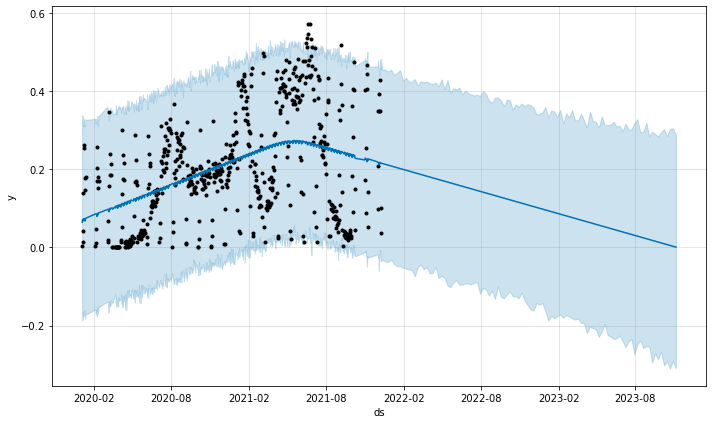

In [94]:
plotPronExcMorCerVas=m.plot(forecast)

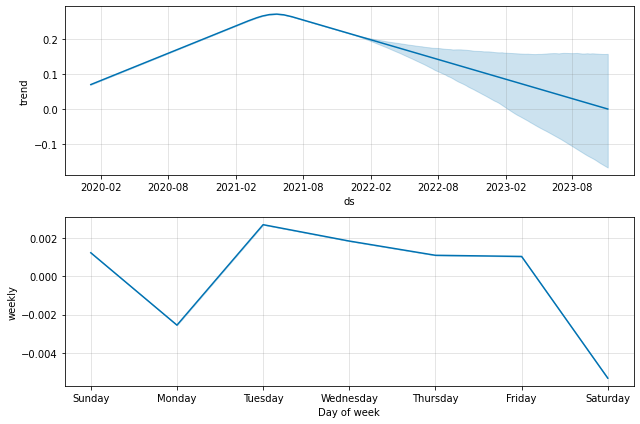

In [95]:
plotPronExcMorCerVas=m.plot_components(forecast)

In [96]:
365*2

730

In [97]:
# Diagnosticos de  Validacion cruzada
df_cv1 = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv1

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-10 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-11,0.215608,0.026357,0.406933,0.159216,2020-09-10
1,2020-09-12,0.211096,0.017872,0.389414,0.162604,2020-09-10
2,2020-09-13,0.203627,0.007281,0.400751,0.176129,2020-09-10
3,2020-09-14,0.204865,0.005042,0.403010,0.168079,2020-09-10
4,2020-09-15,0.216822,0.039476,0.410306,0.186684,2020-09-10
...,...,...,...,...,...,...
641,2021-12-05,0.330403,0.154963,0.501564,0.392821,2020-12-09
642,2021-12-06,0.331885,0.153048,0.505944,0.429708,2020-12-09
643,2021-12-07,0.337567,0.152157,0.493699,0.348460,2020-12-09
644,2021-12-08,0.336078,0.150049,0.509746,0.101357,2020-12-09


In [98]:
# Metricas de Diagnostico
df_p = performance_metrics(df_cv1).dropna()
df_p

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,34 days,0.008173,0.090404,0.068233,0.279007,0.906250
1,35 days,0.008676,0.093144,0.070717,0.285358,0.890625
2,36 days,0.009267,0.096267,0.073565,0.285358,0.875000
3,37 days,0.010031,0.100157,0.077273,0.295194,0.859375
4,38 days,0.010778,0.103817,0.080952,0.307738,0.843750
...,...,...,...,...,...,...
321,361 days,0.072546,0.269344,0.236765,0.974472,0.406250
322,362 days,0.072427,0.269122,0.236233,0.974472,0.406250
323,363 days,0.073540,0.271183,0.237077,1.089828,0.390625
324,364 days,0.076402,0.276409,0.241971,1.320888,0.375000


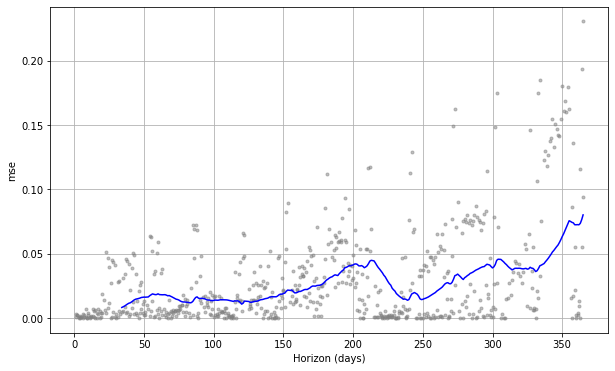

In [99]:
# Plot de la validacion cruzada
figPronExcMorCerVas = plot_cross_validation_metric(df_cv1, metric='mse')

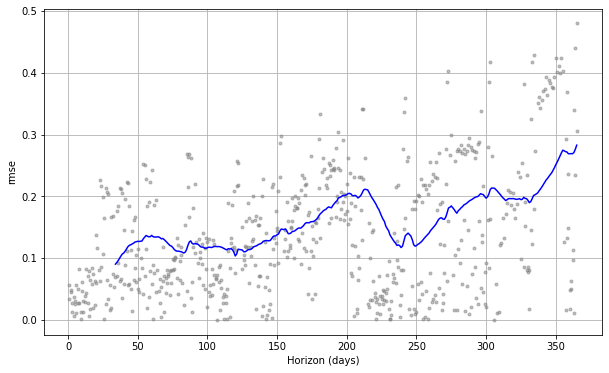

In [100]:
fig2PronExcMorCerVas = plot_cross_validation_metric(df_cv1, metric='rmse')

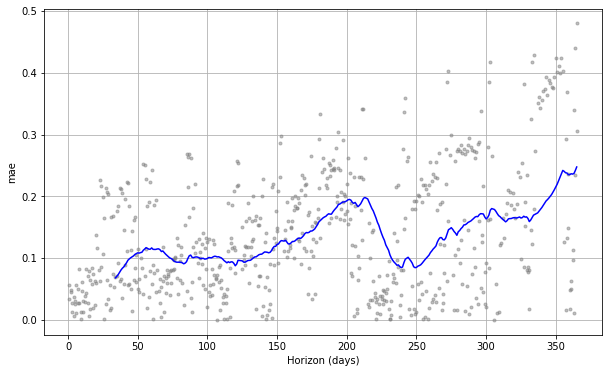

In [101]:
fig3PronExcMorCerVas = plot_cross_validation_metric(df_cv1, metric='mae')

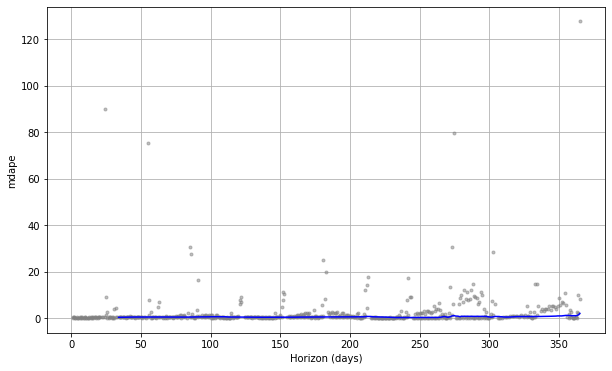

In [102]:
fig5PronExcMorCerVas = plot_cross_validation_metric(df_cv1, metric='mdape')


In [103]:
df_p[['horizon','mdape']].max()
# Dado que tenemos una desviacion despues de al rededor de 1.95 % en 365 dias, tenemos un error porcentual lo suficientemente bajo.   

horizon    365 days 00:00:00
mdape                1.95364
dtype: object

# MACHINE LEARNING EXCESO DE MORTANDAD CEREBRO BASCULAR-COVID 

In [104]:
#Machine Leraning con Sklearning
# creamos test dataset, remove last 12 meses
train = df_PronExcMorCerVas.drop(df_PronExcMorCerVas.index[-12:])
print(train)

                    ds         y
0     1/1/2021 0:00:00  0.271058
1    1/10/2020 0:00:00  0.177038
2    1/10/2021 0:00:00  0.037810
3    1/11/2020 0:00:00  0.147020
4    1/12/2020 0:00:00  0.179386
..                 ...       ...
554  9/10/2021 0:00:00  0.003760
555  9/11/2020 0:00:00  0.159216
556  9/12/2020 0:00:00  0.162604
557   9/2/2021 0:00:00  0.184544
558   9/3/2021 0:00:00  0.109809

[559 rows x 2 columns]


In [105]:
# define the model
#model = Prophet()
# fit the model
#model.fit(train)
m=Prophet(interval_width=0.95,weekly_seasonality=True)
model=m.fit(df_PronExcMorCerVas)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [106]:
# Definimos el periodos de la prediccion
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] #= to_datetime(future['ds'])

0     2021-01
1     2021-02
2     2021-03
3     2021-04
4     2021-05
5     2021-06
6     2021-07
7     2021-08
8     2021-09
9     2021-10
10    2021-11
11    2021-12
Name: ds, dtype: object

In [107]:
# define the period for which we want a prediction
# use the model to make a forecast
#future=model.make_future_dataframe(periods=24,freq='M')
#forecast=m.predict(future)
#forecast#.head()
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,0.225494,-0.009587,0.485612,0.225494,0.225494,0.001028,0.001028,0.001028,0.001028,0.001028,0.001028,0.0,0.0,0.0,0.226522
1,2021-02-01,0.238702,-0.013806,0.489118,0.238702,0.238702,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,0.0,0.0,0.0,0.236159
2,2021-03-01,0.250580,0.006052,0.499910,0.250580,0.250580,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,-0.002543,0.0,0.0,0.0,0.248037
3,2021-04-01,0.262604,0.014829,0.510351,0.262604,0.262604,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.0,0.0,0.0,0.263691
4,2021-05-01,0.270527,0.012660,0.500679,0.270527,0.270527,-0.005298,-0.005298,-0.005298,-0.005298,-0.005298,-0.005298,0.0,0.0,0.0,0.265229
5,2021-06-01,0.271035,0.053566,0.538876,0.271035,0.271035,0.002679,0.002679,0.002679,0.002679,0.002679,0.002679,0.0,0.0,0.0,0.273714
6,2021-07-01,0.264777,0.033324,0.498991,0.264777,0.264777,0.001087,0.001087,0.001087,0.001087,0.001087,0.001087,0.0,0.0,0.0,0.265865
7,2021-08-01,0.255188,0.013678,0.490510,0.255188,0.255188,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,0.256407
8,2021-09-01,0.245599,0.006233,0.491167,0.245599,0.245599,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.0,0.0,0.0,0.247427
9,2021-10-01,0.236320,-0.007783,0.493251,0.236320,0.236320,0.001028,0.001028,0.001028,0.001028,0.001028,0.001028,0.0,0.0,0.0,0.237348


In [108]:
# calculate MAE between expected and predicted values for december
y_true = df_PronExcMorCerVas['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.141


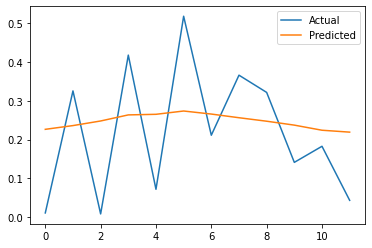

In [109]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
# Como podemos detallar debido a la gran dispersion de los datos, la maquina se encuentra confundida,
#por lo que que es pertinente seguir entrenandola con los otros sets de datos, con los que contamos.

#EXCESO MORTANDAD DIABETES MELLITUS-COVID

In [110]:
#Creamos el modelo simple para poderlo medir con el de la prediccion
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_PronExcMorDiaMel)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [111]:
future=m.make_future_dataframe(periods=100,freq='W')
forecast=m.predict(future)
forecast#.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,0.086277,-1.529980,2.327099,0.086277,0.086277,0.240838,0.240838,0.240838,0.282941,0.282941,0.282941,-0.042102,-0.042102,-0.042102,0.0,0.0,0.0,0.327115
1,2020-01-05,0.089721,-1.491663,2.368632,0.089721,0.089721,0.298664,0.298664,0.298664,0.282941,0.282941,0.282941,0.015724,0.015724,0.015724,0.0,0.0,0.0,0.388385
2,2020-01-06,0.093164,-1.506183,2.342166,0.093164,0.093164,0.269010,0.269010,0.269010,0.282941,0.282941,0.282941,-0.013931,-0.013931,-0.013931,0.0,0.0,0.0,0.362174
3,2020-01-07,0.096608,-1.506758,2.192518,0.096608,0.096608,0.299558,0.299558,0.299558,0.282941,0.282941,0.282941,0.016617,0.016617,0.016617,0.0,0.0,0.0,0.396166
4,2020-01-08,0.100052,-1.693839,2.325768,0.100052,0.100052,0.292128,0.292128,0.292128,0.282941,0.282941,0.282941,0.009187,0.009187,0.009187,0.0,0.0,0.0,0.392179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,2023-10-08,-0.534469,-2.492061,2.048087,-1.752219,0.700977,0.298664,0.298664,0.298664,0.282941,0.282941,0.282941,0.015724,0.015724,0.015724,0.0,0.0,0.0,-0.235805
667,2023-10-15,-0.553419,-2.538968,2.063210,-1.787083,0.699088,0.298664,0.298664,0.298664,0.282941,0.282941,0.282941,0.015724,0.015724,0.015724,0.0,0.0,0.0,-0.254754
668,2023-10-22,-0.572368,-2.452388,2.127089,-1.826478,0.698122,0.298664,0.298664,0.298664,0.282941,0.282941,0.282941,0.015724,0.015724,0.015724,0.0,0.0,0.0,-0.273704
669,2023-10-29,-0.591318,-2.614620,2.052778,-1.881453,0.694195,0.298664,0.298664,0.298664,0.282941,0.282941,0.282941,0.015724,0.015724,0.015724,0.0,0.0,0.0,-0.292653


In [112]:
# Visualizamos el pronostico
forecast[['ds','yhat']]


,ds,yhat
0,2020-01-04,0.327115
1,2020-01-05,0.388385
2,2020-01-06,0.362174
3,2020-01-07,0.396166
4,2020-01-08,0.392179
...,...,...
666,2023-10-08,-0.235805
667,2023-10-15,-0.254754
668,2023-10-22,-0.273704
669,2023-10-29,-0.292653


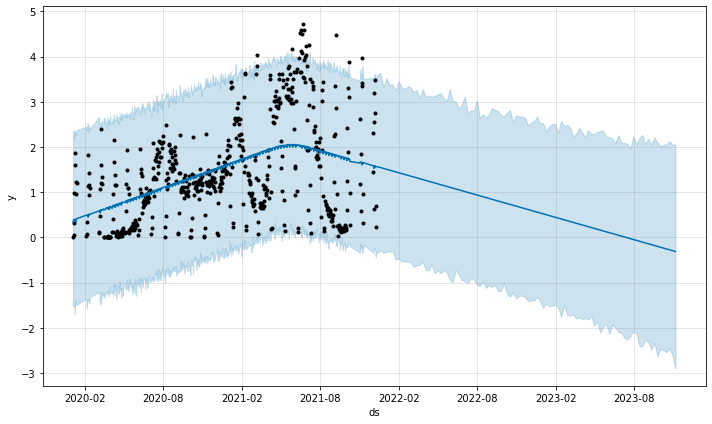

In [113]:
plotPronExcMorDiaMel=m.plot(forecast)


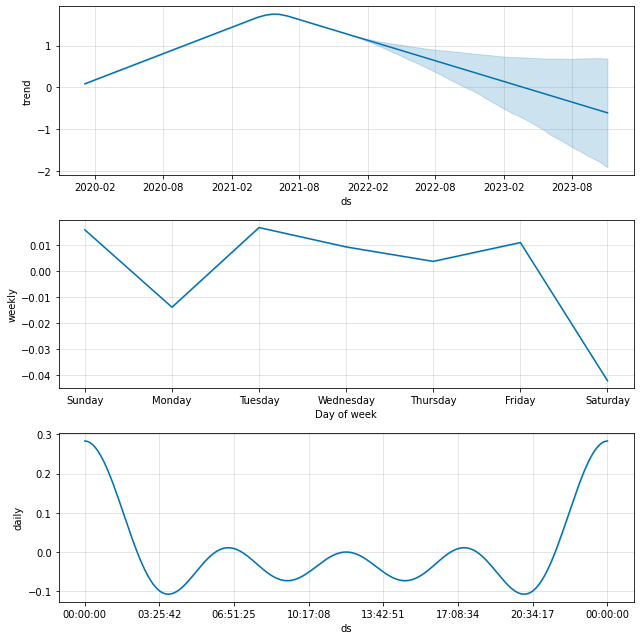

In [114]:
plotPronExcMorDiaMel=m.plot_components(forecast)


In [115]:
# Diagnosticos de  Validacion cruzada
df_cv2 = cross_validation(m, initial='180 days', period='90 days', horizon = '365 days')
df_cv2


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-09-10 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-11,1.468695,0.214462,2.777820,0.996627,2020-09-10
1,2020-09-12,1.443698,0.229199,2.795404,1.059847,2020-09-10
2,2020-09-13,1.393368,0.134582,2.580037,1.123933,2020-09-10
3,2020-09-14,1.394402,0.178832,2.695677,1.102672,2020-09-10
4,2020-09-15,1.464623,0.226683,2.647534,1.237653,2020-09-10
...,...,...,...,...,...,...
641,2021-12-05,2.137777,0.909224,3.373047,3.185138,2020-12-09
642,2021-12-06,2.143253,0.870713,3.278323,3.492454,2020-12-09
643,2021-12-07,2.175011,1.001085,3.314760,2.757831,2020-12-09
644,2021-12-08,2.170441,1.016751,3.320699,0.688489,2020-12-09


In [116]:
# Metricas de Diagnostico
df_p2 = performance_metrics(df_cv2)
df_p2


INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,34 days,0.465027,0.681929,0.494952,0.291986,0.890625
1,35 days,0.483766,0.695533,0.509534,0.303986,0.890625
2,36 days,0.505221,0.710789,0.525163,0.307966,0.890625
3,37 days,0.531422,0.728987,0.546987,0.318277,0.890625
4,38 days,0.556721,0.746137,0.569254,0.328075,0.875000
...,...,...,...,...,...,...
321,361 days,3.403597,1.844884,1.617829,0.853807,0.437500
322,362 days,3.422542,1.850011,1.625875,0.853807,0.421875
323,363 days,3.493542,1.869102,1.647635,0.954196,0.406250
324,364 days,3.641078,1.908161,1.687067,1.250054,0.375000


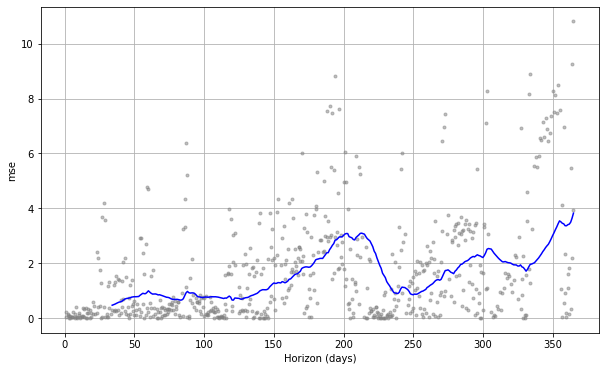

In [117]:
# Plot de la validacion cruzada
figPronExcMorDiaMel = plot_cross_validation_metric(df_cv2, metric='mse')
#df_cv2['horizon','mse'].max()

In [118]:
df_p2[['horizon','mse']].max()

horizon    365 days 00:00:00
mse                  3.82332
dtype: object

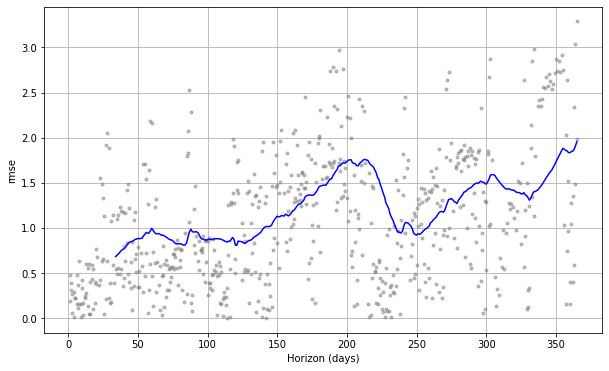

In [119]:
fig2PronExcMorDiaMel = plot_cross_validation_metric(df_cv2, metric='rmse')


In [120]:
df_p2[['horizon','rmse']].max()

horizon    365 days 00:00:00
rmse                 1.95533
dtype: object

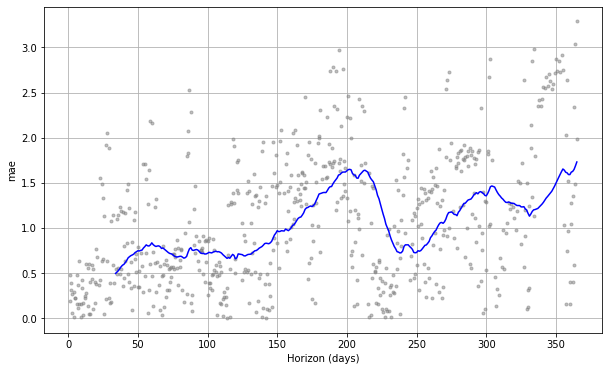

In [121]:
fig3PronExcMorDiaMel = plot_cross_validation_metric(df_cv2, metric='mae')


In [122]:
df_p2[['horizon','mae']].max()

horizon    365 days 00:00:00
mae                  1.73061
dtype: object

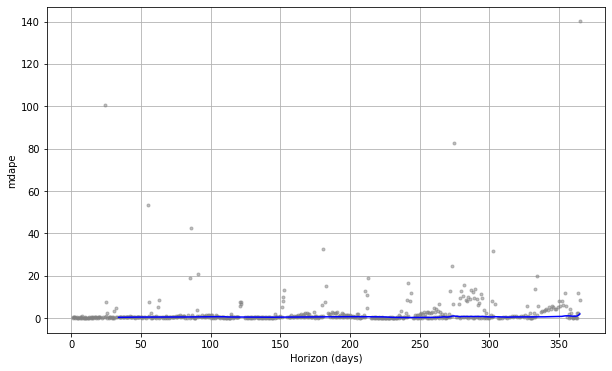

In [123]:
fig5PronExcMorDiaMel = plot_cross_validation_metric(df_cv2, metric='mdape')


In [124]:
df_p2[['horizon','mdape']].max()

horizon    365 days 00:00:00
mdape                1.90125
dtype: object

# Machine Learning Diabetes Mellitus

In [125]:
#Machine Leraning con Sklearning
# creamos test dataset, remove last 12 meses
train = df_PronExcMorDiaMel.drop(df_PronExcMorDiaMel.index[-12:])
print(train)


                    ds         y
0     1/1/2021 0:00:00  1.803988
1    1/10/2020 0:00:00  1.236576
2    1/10/2021 0:00:00  0.237956
3    1/11/2020 0:00:00  0.969239
4    1/12/2020 0:00:00  1.193412
..                 ...       ...
554  9/10/2021 0:00:00  0.023479
555  9/11/2020 0:00:00  0.996627
556  9/12/2020 0:00:00  1.059847
557   9/2/2021 0:00:00  1.232407
558   9/3/2021 0:00:00  0.636402

[559 rows x 2 columns]


In [126]:
# definimos the model
m=Prophet(interval_width=0.95,weekly_seasonality=True)
model=m.fit(df_PronExcMorDiaMel)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
# Definimos el periodos de la prediccion
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] #= to_datetime(future['ds'])


0     2021-01
1     2021-02
2     2021-03
3     2021-04
4     2021-05
5     2021-06
6     2021-07
7     2021-08
8     2021-09
9     2021-10
10    2021-11
11    2021-12
Name: ds, dtype: object

In [128]:
#Pronostico entrenado
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,1.630181,-0.321568,3.503144,1.630181,1.630181,0.010496,0.010496,0.010496,0.010496,0.010496,0.010496,0.0,0.0,0.0,1.640676
1,2021-02-01,1.739033,-0.067421,3.685692,1.739033,1.739033,-0.013628,-0.013628,-0.013628,-0.013628,-0.013628,-0.013628,0.0,0.0,0.0,1.725405
2,2021-03-01,1.837350,0.041085,3.609993,1.837350,1.837350,-0.013628,-0.013628,-0.013628,-0.013628,-0.013628,-0.013628,0.0,0.0,0.0,1.823722
3,2021-04-01,1.945303,0.070081,3.872739,1.945303,1.945303,0.003967,0.003967,0.003967,0.003967,0.003967,0.003967,0.0,0.0,0.0,1.949270
4,2021-05-01,2.029853,0.196056,3.892402,2.029853,2.029853,-0.042608,-0.042608,-0.042608,-0.042608,-0.042608,-0.042608,0.0,0.0,0.0,1.987246
5,2021-06-01,2.048907,0.148056,4.042962,2.048907,2.048907,0.016995,0.016995,0.016995,0.016995,0.016995,0.016995,0.0,0.0,0.0,2.065902
6,2021-07-01,1.995448,0.180045,3.918572,1.995448,1.995448,0.003967,0.003967,0.003967,0.003967,0.003967,0.003967,0.0,0.0,0.0,1.999415
7,2021-08-01,1.901109,0.038306,3.912701,1.901109,1.901109,0.015344,0.015344,0.015344,0.015344,0.015344,0.015344,0.0,0.0,0.0,1.916453
8,2021-09-01,1.806770,-0.058689,3.722039,1.806770,1.806770,0.009434,0.009434,0.009434,0.009434,0.009434,0.009434,0.0,0.0,0.0,1.816205
9,2021-10-01,1.715474,-0.124832,3.687832,1.715474,1.715474,0.010496,0.010496,0.010496,0.010496,0.010496,0.010496,0.0,0.0,0.0,1.725970


In [129]:
# calculamos MAE entre periodo experado and predecido
y_true = df_PronExcMorCerVas['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


MAE: 1.598


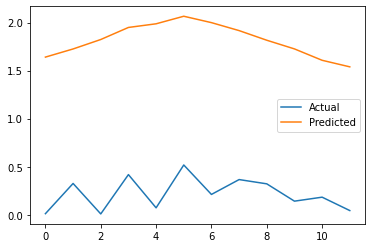

In [130]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()


In [131]:

# Ejercicio de prueba para agrupar.
def mult(r):

  a=df_MortandadCovidTotal['Rango_Edad'].sort_index(inplace=True)
  b=df_MortandadCovidTotal['Fallecidos'].astype('float')
  x=df_MortandadComorbilidad['Rango_Edad'].sort_index(inplace=True)
  y=df_MortandadComorbilidad['CerebroVascular'].astype('float')
  #r=0
  for i in df_MortandadComorbilidad:
    for j in df_MortandadCovidTotal:
      if (i == j):
        r=0
        return r
      else:
        r=1
        return r
df_MortandadCovidTotal['CerVasc']=df_MortandadCovidTotal.apply(mult,axis=1)

def mut (r1):
  a=df_MortandadCovidTotal['Rango_Edad'].sort_index(inplace=True)
  b=df_MortandadCovidTotal['Fallecidos']#.astype('float')
  x=df_MortandadComorbilidad['Rango_Edad'].sort_index(inplace=True)
  y=df_MortandadComorbilidad['Tasa_%-CerebroVascular'].astype('float')
  for fila in df_MortandadCovidTotal:
    for fila in df_MortandadComorbilidad:
      if a==x:
        r1=b*y
        return r
      else:
        r1=b+y   #0.0#b/y 
        return r1

df_MortandadCovidTotal['CerVascCant']=df_MortandadCovidTotal.apply(mult,axis=1)
df_MortandadCovidTotal

#df_MortandadCovidTotal#*df_MortandadComorbilidad

,Fecha de muerte,Rango_Edad,Fallecidos,CerVasc,CerVascCant
0,1/1/2021 0:00:00,0-9,1,1,1
1,1/1/2021 0:00:00,10-19,2,1,1
2,1/1/2021 0:00:00,20-29,2,1,1
3,1/1/2021 0:00:00,30-39,6,1,1
4,1/1/2021 0:00:00,40-49,25,1,1
...,...,...,...,...,...
4482,9/9/2021 0:00:00,50-59,4,1,1
4483,9/9/2021 0:00:00,60-69,10,1,1
4484,9/9/2021 0:00:00,70-79,10,1,1
4485,9/9/2021 0:00:00,80-89,14,1,1


In [134]:
df_PronosticoGeneral.to_excel('PronosticoGeneral.xlsx')
forecast.to_excel('PronosticoGeneral.xlsx')
df_cv.to_excel('PrimeraValidacion.xlsx')
# Serie temporal
df_MortandadCovidTotal.to_excel('MortandadCovidTotal.xlsx')
# consultado
df_ExcMorComCov.to_excel('ExcMorComCov.xlsx')
#cervas
df_ExcMorCerVas.to_excel('ExcMorCerVas.xlsx')
df_PronExcMorCerVas.to_excel('PronExcMorCerVas.xlsx')
#Diabetes
df_ExcMorDiaMel.to_excel('ExcMorDiaMel.xlsx')
df_PronExcMorDiaMel.to_excel('PronExcMorDiaMel.xlsx')
#Renal
df_ExcMorRen.to_excel('ExcMorRen.xlsx')
df_PronExcMorRen.to_excel('PronExcMorRen.xlsx')
#Tiroides
df_ExcMorTir.to_excel('ExcMorTir.xlsx')
df_PronExcMorTir.to_excel('PronExcMorTir.xlsx')
#Obesidad
df_ExcMorObe.to_excel('ExcMorObe.xlsx')
df_PronExcMorObe.to_excel('PronExcMorObe.xlsx')
#Humos
df_ExcMorFum.to_excel('ExcMorFum.xlsx')
df_PronExcMorFum.to_excel('PronExcMorFum.xlsx')
#Cardiaca
df_ExcMorCar.to_excel('ExcMorCar.xlsx')
df_PronExcMorCar.to_excel('PronExcMorCar.xlsx')
#Respiratorias
df_ExcMorRes.to_excel('ExcMorRes.xlsx')
df_PronExcMorRes.to_excel('PronExcMorRes.xlsx')
#TumoresCanceres
df_ExcMorCan.to_excel('ExcMorCan.xlsx')
df_PronExcMorCan.to_excel('PronExcMorCan.xlsx')
#Autoinmune
df_ExcMorAut.to_excel('ExcMorAut.xlsx')
df_PronExcMorAut.to_excel('PronExcMorAut.xlsx')
#Vih
df_ExcMorVih.to_excel('ExcMorVih.xlsx')
df_PronExcMorVih.to_excel('PronExcMorVih.xlsx')
#Otras comorbilidades
df_ExcMorOtr.to_excel('ExcMorOtr.xlsx')
df_PronExcMorOtr.to_excel('PronExcMorOtr.xlsx')
forecast.to_excel('forecast.xlsx')
df_cv1.to_excel('cv1.xlsx')
df_p.to_excel('Parametros.xlsx')
